In [161]:
## IMPORT LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


#pip install --upgrade seaborn
#pip install --upgrade matplotlib

In [162]:
## IMPORT DATA
data = pd.read_csv('/Users/aycan/Documents/Greenbootcamps04032024/DS_final_project/data/Cardetails-2.csv')

In [163]:
df = pd.DataFrame(data)

In [164]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [165]:
## 1) DATA PREPROCESSING
df.shape

(8128, 13)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [167]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [168]:
# 1a) Handling Missing Values

def missing_value_summary(df):
    
    missing_count = df.isnull().sum()

    total_rows = len(df)
    missing_percentage = (missing_count / total_rows) * 100

    summary_df = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage': missing_percentage
    })

    return summary_df

missing_value_summary(df)

,Missing Values,Percentage
name,0,0.000000
year,0,0.000000
selling_price,0,0.000000
km_driven,0,0.000000
fuel,0,0.000000
seller_type,0,0.000000
transmission,0,0.000000
owner,0,0.000000
mileage,221,2.718996
engine,221,2.718996


In [169]:
# We can drop the missing values (Because it is less than %3)

df.dropna(inplace=True) 
df.reset_index(drop=True, inplace=True)  

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 803.1+ KB


In [171]:
# 1b) Handling Duplicate Values

def dup_summary(df):
  
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])

    summ['Duplicated Rows'] = df.duplicated().sum()
    summ['Count'] = df.count().values
    summ['Duplicated Rows %'] = ((df.duplicated().sum()) / len(df))*100
 
    display(summ)

dup_summary(df)

,Data Type,Duplicated Rows,Count,Duplicated Rows %
name,object,1189,7906,15.039211
year,int64,1189,7906,15.039211
selling_price,int64,1189,7906,15.039211
km_driven,int64,1189,7906,15.039211
fuel,object,1189,7906,15.039211
seller_type,object,1189,7906,15.039211
transmission,object,1189,7906,15.039211
owner,object,1189,7906,15.039211
mileage,object,1189,7906,15.039211
engine,object,1189,7906,15.039211


In [172]:
# Lets check where is these duplicated values?

duplicated_rows = df[df.duplicated()]
duplicated_indexes = duplicated_rows.index

print("Indexes of duplicated rows:")
print(duplicated_indexes)

Indexes of duplicated rows:
Index([ 281,  286,  357,  358,  359,  374,  395,  396,  397,  398,
       ...
       7764, 7765, 7766, 7767, 7768, 7769, 7770, 7895, 7904, 7905],
      dtype='int64', length=1189)


In [173]:
# Lets control one of them (for the row 287)
df.iloc[280:285]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
280,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
281,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
282,Hyundai i10 Sportz AT,2013,290000,50000,Petrol,Individual,Automatic,First Owner,16.95 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
283,Maruti Swift VXI Deca,2016,520000,20000,Petrol,Individual,Manual,First Owner,20.4 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
284,Hyundai i10 Sportz AT,2011,265000,20000,Petrol,Individual,Automatic,First Owner,16.95 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


In [174]:
# We should remove duplicated values

df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 682.3+ KB


In [176]:
## 1c)Feature Engineering

# drop 'torque' column
df = df.drop(columns=['torque'])

In [177]:
# Lets convert some non-numeric columns into numeric
# Start with 'mileage' column

df.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', '18.9 kmpl', '18.15 kmpl',
       '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl',
       '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl',
       '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl',
       '33.44 km/kg', '23.95 kmpl', '17.0 kmpl', '20.63 kmpl',
       '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '20.65 kmpl',
       '27.3 kmpl', '11.36 kmpl', '17.68 kmpl', '14.28 kmpl',
       '18.53 kmpl', '14.84 kmpl', '21.12 kmpl', '20.36 kmpl',
       '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl', '20.51 kmpl',
       '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl', '20.54 kmpl',
       '22.77 kmpl', '15.71 kmpl', '23.1 kmpl', '19.02 kmpl',
       '19.81 kmpl', '26

In [178]:
# We must replace non numeric expressions with space""

df['mileage'] = df['mileage'].str.replace("kmpl", "").str.replace("km/kg", "")

In [179]:
# Then convert it to numeric

df['mileage'] = pd.to_numeric(df['mileage'])

In [180]:
# We can also convert 'engine' column to numeric

df.engine.unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC', '2755 CC',
       '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC', '1998 CC',
       '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC', '999 CC',
       '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC', '1451 CC',
       '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC', '2362 CC',
       '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC', '1193 CC',
       '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC', '2956 CC',
       '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC', '2354 CC',
       '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC', '1997 CC',
       '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC', '2609 CC',
       '2953 CC', '1150 CC', '1994 CC', '1388 CC', '1527 CC'

In [181]:
df['engine'] = df['engine'].str.replace("CC", "")
df['engine'] = pd.to_numeric(df['engine'])

In [182]:
# Let convert 'max_power' column to numeric, too

df.max_power.unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', '67 bhp', '82 bhp', '88.5 bhp',
       '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp',
       '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp', '138.03 bhp',
       '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp', '67.05 bhp',
       '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp', '175.56 bhp',
       '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp',
       '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp',
       '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp',
       '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp', '81.80 bhp',
       '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp', '126.2 bhp',
       '98.96 bh

In [183]:
df['max_power'] = df['max_power'].str.replace("bhp", "")
df['max_power'] = pd.to_numeric(df['max_power'])

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   int64  
 10  max_power      6717 non-null   float64
 11  seats          6717 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 629.8+ KB


In [185]:
# Lets make a summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Miss'] = df.isna().sum()
    summ['Dups'] = df.duplicated().sum()
    summ['Uniq'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Top'] = desc['top'].values
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Avrg'] = desc['mean'].values
    summ['St_Dev'] = desc['std'].values
  
    display(summ)

summary(df)

data shape: (6717, 12)


,Data Type,Miss,Dups,Uniq,Count,Top,Min,Max,Avrg,St_Dev
name,object,0,0,1982,6717,Maruti Swift Dzire VDI,NaN,NaN,NaN,NaN
year,int64,0,0,27,6717,NaN,1994.0,2020.0,2013.611136,3.897402
selling_price,int64,0,0,670,6717,NaN,29999.0,10000000.0,526385.997022,523550.448297
km_driven,int64,0,0,898,6717,NaN,1.0,2360457.0,73398.337651,58703.27527
fuel,object,0,0,4,6717,Diesel,NaN,NaN,NaN,NaN
seller_type,object,0,0,3,6717,Individual,NaN,NaN,NaN,NaN
transmission,object,0,0,2,6717,Manual,NaN,NaN,NaN,NaN
owner,object,0,0,5,6717,First Owner,NaN,NaN,NaN,NaN
mileage,float64,0,0,381,6717,NaN,0.0,42.0,19.466585,4.048102
engine,int64,0,0,121,6717,NaN,624.0,3604.0,1430.985857,493.469198


In [186]:
# Lets add a new column as 'age'

#from datetime import datetime

#current_year = datetime.now().year
#df['age'] = current_year - df['year']

In [187]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0


In [188]:
# We must create 2 columns from 'name': Brand and Model

df.name.unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [189]:
# First, lets copy it. Now we have 'name' and 'name_2' columns

df['name_2'] = df['name']

In [190]:
# Now, name=brand ; name_2=model

df.rename(columns={'name': 'brand'}, inplace=True)
df.rename(columns={'name_2': 'model'}, inplace=True)

In [191]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti Swift VXI BSIII


In [192]:
# Lets split 'brand' values by space and keep only the first element
# For example: Maruti Swift Dzire VDI

df['brand'] = df['brand'].str.split().str[0]

In [193]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,model
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti Swift Dzire VDI
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda Rapid 1.5 TDI Ambition
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda City 2017-2020 EXi
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai i20 Sportz Diesel
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti Swift VXI BSIII


In [194]:
df.brand.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [195]:
# How many unique values for brand?
df.brand.nunique()

31

In [196]:
# Lets print unique values alphabetically to check 
# whether we have duplicated values

unique_brands = sorted(df['brand'].unique())

for name in unique_brands:
    print(name)

Ambassador
Ashok
Audi
BMW
Chevrolet
Daewoo
Datsun
Fiat
Force
Ford
Honda
Hyundai
Isuzu
Jaguar
Jeep
Kia
Land
Lexus
MG
Mahindra
Maruti
Mercedes-Benz
Mitsubishi
Nissan
Opel
Renault
Skoda
Tata
Toyota
Volkswagen
Volvo


In [197]:
# Lets split 'model' values by space and keep only the second element
# For example: Maruti Swift Dzire VDI

df['model'] = df['model'].str.split().str[1]

In [198]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,model
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Swift
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Rapid
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,City
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,i20
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Swift


In [199]:
# How many unique values for model?
df.model.nunique()

197

In [200]:
df.model.unique()

array(['Swift', 'Rapid', 'City', 'i20', 'Xcent', 'Wagon', '800', 'Etios',
       'Figo', 'Duster', 'Zen', 'KUV', 'Ertiga', 'Alto', 'Verito', 'WR-V',
       'SX4', 'Tigor', 'Baleno', 'Enjoy', 'Omni', 'Vitara', 'Verna', 'GO',
       'Safari', 'Compass', 'Fortuner', 'Innova', 'B', 'Amaze', 'Pajero',
       'Ciaz', 'Jazz', 'A6', 'Corolla', 'New', 'Manza', 'i10', 'Ameo',
       'Vento', 'EcoSport', 'X1', 'Celerio', 'Polo', 'Eeco', 'Scorpio',
       'Freestyle', 'Passat', 'Indica', 'XUV500', 'Indigo', 'Terrano',
       'Creta', 'KWID', 'Santro', 'Q5', 'ES', 'XF', 'Wrangler', 'Rover',
       'S-Class', '5', 'X4', 'Superb', 'E-Class', 'Hector', 'XC40', 'Q7',
       'Elantra', 'XE', 'Nexon', 'CLA', 'Glanza', '3', 'Camry', 'XC90',
       'Ritz', 'Grand', 'Matiz', 'Zest', 'Getz', 'Elite', 'Brio', 'Hexa',
       'Sunny', 'Micra', 'Ssangyong', 'Quanto', 'Accent', 'Ignis',
       'Marazzo', 'Tiago', 'Thar', 'Sumo', 'Bolero', 'GL-Class', 'Beat',
       'A-Star', 'XUV300', 'Nano', 'GTI', 'V40', 'CR-V'

In [201]:
# Lets print unique values alphabetically to check 
# if we still have duplicated values

unique_models = sorted(df['model'].unique())

for name in unique_models:
    print(name)

3
5
6
7
800
A-Star
A3
A4
A6
Accent
Accord
Alto
Amaze
Ameo
Aria
Aspire
Astra
Aveo
Avventura
B
BR-V
BRV
Baleno
Beat
Bolero
Bolt
Brio
CLA
CLASSIC
CR-V
Camry
Captiva
Captur
Celerio
Ciaz
City
Civic
Classic
Compass
Corolla
Creta
CrossPolo
Cruze
D-Max
Duster
Dzire
E-Class
EON
ES
EcoSport
Ecosport
Eeco
Elantra
Elite
Endeavour
Enjoy
Ertiga
Esteem
Etios
Fabia
Fiesta
Figo
Fluence
Fortuner
Freestyle
Fusion
GL-Class
GLA
GLC
GO
GTI
Getz
Glanza
Grand
Grande
Gurkha
Gypsy
Harrier
Hector
Hexa
Ignis
Ikon
Indica
Indigo
Innova
Jazz
Jetta
KUV
KWID
Kicks
Kodiaq
Koleos
Lancer
Land
Laura
Leyland
Linea
Lodgy
Logan
M-Class
MU
MUX
Manza
Marazzo
Matiz
Micra
Mobilio
Nano
New
Nexon
NuvoSport
Octavia
Omni
One
Optra
Pajero
Passat
Platinum
Polo
Pulse
Punto
Q3
Q5
Q7
Qualis
Quanto
Rapid
RediGO
Renault
Ritz
Rover
S-Class
S-Cross
S-Presso
S60
S90
SX4
Safari
Sail
Santa
Santro
Scala
Scorpio
Seltos
Sonata
Spacio
Spark
Ssangyong
Sumo
Sunny
Superb
Supro
Swift
TUV
Tavera
Teana
Terrano
Thar
Tiago
Tigor
Trailblazer
Triber
Tucson
V

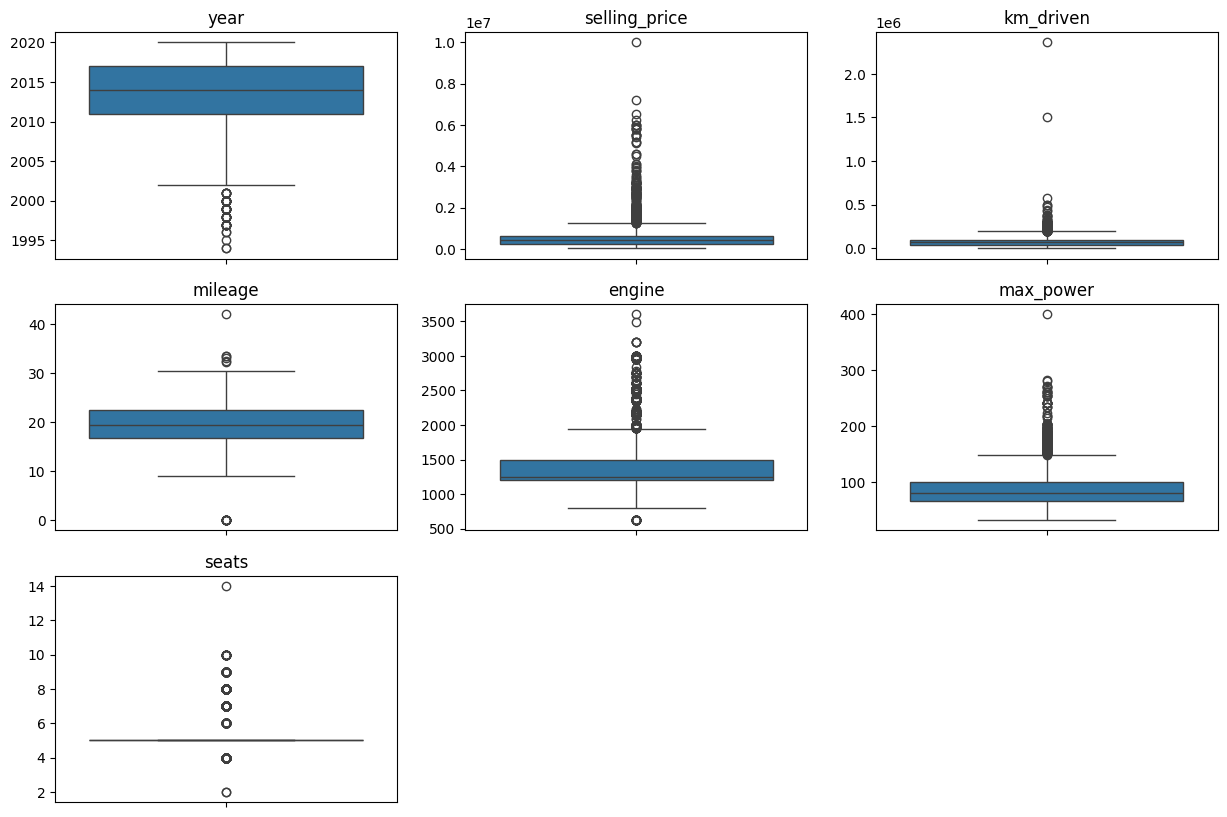

In [202]:
## 2 DATA WRANGLING

# 2a) Handling Outliers

# First,lets see the outliers in boxplot for numerical columns

plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
sns.boxplot(df['year'].values)
plt.title("year")

plt.subplot(3,3,2)
sns.boxplot(df['selling_price'].values)
plt.title("selling_price")

plt.subplot(3,3,3)
sns.boxplot(df['km_driven'].values)
plt.title("km_driven")

plt.subplot(3,3,4)
sns.boxplot(df['mileage'].values)
plt.title("mileage")

plt.subplot(3,3,5)
sns.boxplot(df['engine'].values)
plt.title("engine")

plt.subplot(3,3,6)
sns.boxplot(df['max_power'].values)
plt.title("max_power")

plt.subplot(3,3,7)
sns.boxplot(df['seats'].values)
plt.title("seats")

plt.show()

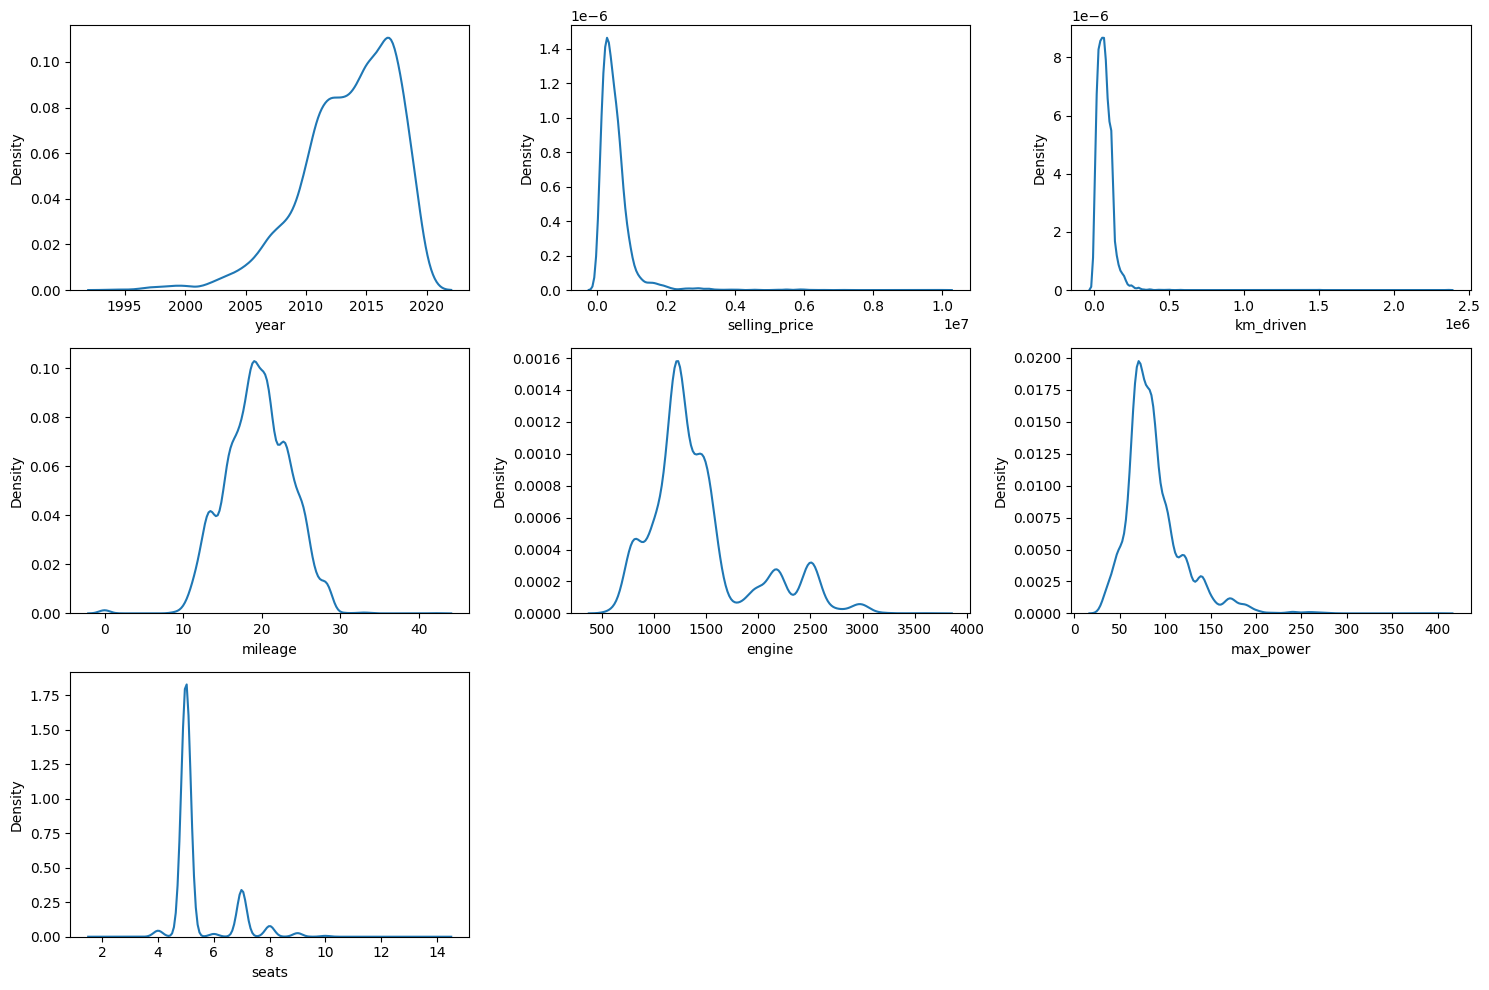

In [203]:
# Lets see the value distribution for numerical columns

plt.figure(figsize=(15,10))

plt.subplot(3,3,1)
sns.kdeplot(df['year'].values)
plt.xlabel('year')

plt.subplot(3,3,2)
sns.kdeplot(df['selling_price'].values)
plt.xlabel('selling_price')

plt.subplot(3,3,3)
sns.kdeplot(df['km_driven'].values)
plt.xlabel('km_driven')

plt.subplot(3,3,4)
sns.kdeplot(df['mileage'].values)
plt.xlabel('mileage')

plt.subplot(3,3,5)
sns.kdeplot(df['engine'].values)
plt.xlabel('engine')

plt.subplot(3,3,6)
sns.kdeplot(df['max_power'].values)
plt.xlabel('max_power')

plt.subplot(3,3,7)
sns.kdeplot(df['seats'].values)
plt.xlabel('seats')

plt.tight_layout()
plt.show()

In [204]:
# Lets deal with outliers with 2 methods:
# Boxplot method and Standard Deviation Method

In [205]:
# Lets make a summary table using Boxplot Method

summary_out_box = []

for col in df.select_dtypes(include=['int', 'float']).columns:
    # Count total rows
    total_rows = df[col].count()
    
    # Calculate outliers
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound_box = q1 - 1.5 * iqr
    upper_bound_box = q3 + 1.5 * iqr
    total_outliers_box = df[(df[col] < lower_bound_box) | (df[col] > upper_bound_box)][col].count()
    
    # Count values smaller than lower bound
    smaller_than_lower_bound_box = df[df[col] < lower_bound_box][col].count()
    
    # Count values greater than upper bound
    greater_than_upper_bound_box = df[df[col] > upper_bound_box][col].count()
    
    # Append to summary table
    summary_out_box.append({'Col_Name': col,
                        'Rows#': total_rows,
                        'Min': df[col].min().astype(int),
                        'Avg': df[col].mean().astype(int),
                        'Max': df[col].max().astype(int),
                        'Low': lower_bound_box.astype(int),
                        'Upp': upper_bound_box.astype(int),
                        'Outliers#': total_outliers_box,
                        '<Low': smaller_than_lower_bound_box,
                        '>Upp': greater_than_upper_bound_box
                        })

summary_out_box = pd.DataFrame(summary_out_box)
summary_out_box


,Col_Name,Rows#,Min,Avg,Max,Low,Upp,Outliers#,<Low,>Upp
0,year,6717,1994,2013,2020,2002,2026,56,56,0
1,selling_price,6717,29999,526385,10000000,-350000,1250000,306,0,306
2,km_driven,6717,1,73398,2360457,-55000,193000,161,0,161
3,mileage,6717,0,19,42,8,31,21,15,6
4,engine,6717,624,1430,3604,745,1949,1207,25,1182
5,max_power,6717,32,87,400,17,149,304,0,304
6,seats,6717,2,5,14,5,5,1463,126,1337


In [206]:
# We have too many outliers for some columns(engine and seats)
# Lower and upper bounds look like irrational

In [207]:
# Lets calculate outliers using Standard Deviation Method

summary_out = []

for col in df.select_dtypes(include=['int', 'float']).columns:
    # Count total rows
    total_rows = df[col].count()
    
    # Calculate outliers using standard deviation method
    mean = df[col].mean()
    std_dev = df[col].std()
    lower_bound = mean - 3 * std_dev  # Adjust multiplier as needed
    upper_bound = mean + 3 * std_dev  # Adjust multiplier as needed
    total_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    
    # Count values smaller than lower bound
    smaller_than_lower_bound = df[df[col] < lower_bound][col].count()
    
    # Count values greater than upper bound
    greater_than_upper_bound = df[df[col] > upper_bound][col].count()
    
    # Append to summary table
    summary_out.append({'Col_Name': col,
                        'Rows#': total_rows,
                        'Min': df[col].min().astype(int),
                        'Avg': df[col].mean().astype(int),
                        'Max': df[col].max().astype(int),
                        'Low': lower_bound.astype(int),
                        'Upp': upper_bound.astype(int),
                        'Outliers#': total_outliers,
                        '<Low': smaller_than_lower_bound,
                        '>Upp': greater_than_upper_bound
                        })

summary_out = pd.DataFrame(summary_out)
summary_out


,Col_Name,Rows#,Min,Avg,Max,Low,Upp,Outliers#,<Low,>Upp
0,year,6717,1994,2013,2020,2001,2025,56,56,0
1,selling_price,6717,29999,526385,10000000,-1044265,2097037,105,0,105
2,km_driven,6717,1,73398,2360457,-102711,249508,59,0,59
3,mileage,6717,0,19,42,7,31,21,15,6
4,engine,6717,624,1430,3604,-49,2911,89,0,89
5,max_power,6717,32,87,400,-7,182,115,0,115
6,seats,6717,2,5,14,2,8,95,2,93


In [208]:
# Looks gut. Lower and upper bounds look like more rational

In [209]:
# Remove outliers according to standard deviation method

def remove_outliers_std(df):

    df_cleaned = df.copy()  # Create a copy to avoid modifying the original DataFrame
    
    for col in df_cleaned.select_dtypes(include=['int', 'float']).columns:
        mean = df_cleaned[col].mean()
        std_dev = df_cleaned[col].std()
        lower_bound = mean - 3 * std_dev  # Adjust multiplier as needed
        upper_bound = mean + 3 * std_dev  # Adjust multiplier as needed
        
        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned


In [210]:
# Our clean dataframe:

cleaned_df = remove_outliers_std(df)

In [211]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6241 entries, 0 to 6716
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          6241 non-null   object 
 1   year           6241 non-null   int64  
 2   selling_price  6241 non-null   int64  
 3   km_driven      6241 non-null   int64  
 4   fuel           6241 non-null   object 
 5   seller_type    6241 non-null   object 
 6   transmission   6241 non-null   object 
 7   owner          6241 non-null   object 
 8   mileage        6241 non-null   float64
 9   engine         6241 non-null   int64  
 10  max_power      6241 non-null   float64
 11  seats          6241 non-null   float64
 12  model          6241 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 682.6+ KB


In [212]:
## 3) MACHINE LEARNING

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [213]:
# 3a) Label Encoding
# first create a list for categorical columns

cat=[]
for i in cleaned_df.columns:
    if cleaned_df[i].dtypes=="object":
        cat.append (i)

In [214]:
cat

['brand', 'fuel', 'seller_type', 'transmission', 'owner', 'model']

In [215]:
le = LabelEncoder()

for i in cat:
    cleaned_df[i] = le.fit_transform(cleaned_df[i])

In [216]:
cleaned_df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,model
0,16,2014,450000,145500,1,1,1,0,23.40,1248,74.00,5.0,123
1,21,2014,370000,120000,1,1,1,2,21.14,1498,103.52,5.0,103
2,9,2006,158000,140000,3,1,1,4,17.70,1497,78.00,5.0,27
3,10,2010,225000,127000,1,1,1,0,23.00,1396,90.00,5.0,152
4,16,2007,130000,120000,3,1,1,0,16.10,1298,88.20,5.0,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,16,2013,260000,50000,3,1,1,2,18.90,998,67.10,5.0,140
6713,10,2014,475000,80000,1,1,1,2,22.54,1396,88.73,5.0,152
6714,10,2013,320000,110000,3,1,1,0,18.50,1197,82.85,5.0,152
6715,10,2007,135000,119000,1,1,1,1,16.80,1493,110.00,5.0,137


In [217]:
# Lets check again for duplicate values for cleaned data:

def dup_summary_c(cleaned_df):
  
    summ_c_d = pd.DataFrame(cleaned_df.dtypes, columns=['Data Type'])

    summ_c_d['Duplicated Rows'] = cleaned_df.duplicated().sum()
    summ_c_d['Count'] = cleaned_df.count().values
    summ_c_d['Duplicated Rows %'] = ((cleaned_df.duplicated().sum()) / len(cleaned_df))*100
 
    display(summ_c_d)

dup_summary_c(cleaned_df)

,Data Type,Duplicated Rows,Count,Duplicated Rows %
brand,int64,19,6241,0.304438
year,int64,19,6241,0.304438
selling_price,int64,19,6241,0.304438
km_driven,int64,19,6241,0.304438
fuel,int64,19,6241,0.304438
seller_type,int64,19,6241,0.304438
transmission,int64,19,6241,0.304438
owner,int64,19,6241,0.304438
mileage,float64,19,6241,0.304438
engine,int64,19,6241,0.304438


In [218]:
duplicated_rows_c = cleaned_df[cleaned_df.duplicated()]
duplicated_indexes_c = duplicated_rows_c.index

In [219]:
duplicated_indexes_c

Index([1779, 2001, 2097, 2372, 2811, 2866, 2980, 3124, 4050, 4515, 4619, 4746,
       5032, 5045, 5276, 5445, 5516, 5630, 5959],
      dtype='int64')

In [220]:
duplicated_rows_c

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,model
1779,16,2016,240000,50000,3,1,1,0,22.74,796,47.30,5.0,6
2001,10,2015,650000,80000,1,1,1,0,22.54,1396,88.73,5.0,152
2097,15,2012,450000,120000,1,1,1,0,15.96,2523,62.10,7.0,18
2372,16,2013,190000,60000,3,1,1,2,22.74,796,47.30,5.0,6
2811,16,2016,470000,23700,3,1,1,0,20.40,1197,81.80,5.0,123
2866,15,2014,850000,120000,1,1,1,0,15.10,2179,140.00,7.0,143
2980,16,2018,550000,5000,3,1,1,0,22.00,1197,81.80,5.0,123
3124,23,2011,550000,250000,1,1,1,2,12.80,2494,102.00,7.0,71
4050,16,2014,240000,50000,3,1,1,0,22.74,796,47.30,5.0,6
4515,10,2010,220000,80000,1,1,1,2,16.20,1493,110.00,5.0,137


In [221]:
# We should remove duplicated values

cleaned_df = cleaned_df.drop_duplicates()
cleaned_df.reset_index(drop=True, inplace=True)

In [222]:
dup_summary_c(cleaned_df)

,Data Type,Duplicated Rows,Count,Duplicated Rows %
brand,int64,0,6222,0.0
year,int64,0,6222,0.0
selling_price,int64,0,6222,0.0
km_driven,int64,0,6222,0.0
fuel,int64,0,6222,0.0
seller_type,int64,0,6222,0.0
transmission,int64,0,6222,0.0
owner,int64,0,6222,0.0
mileage,float64,0,6222,0.0
engine,int64,0,6222,0.0


In [223]:
# Lets make a summary for our cleaned data:

def summary_clean(cleaned_df):
    print(f'data shape: {cleaned_df.shape}')
    summ_c = pd.DataFrame(cleaned_df.dtypes, columns=['Data Type'])
    summ_c['Miss'] = cleaned_df.isna().sum()
    summ_c['Dups'] = cleaned_df.duplicated().sum()
    summ_c['Uniq'] = cleaned_df.nunique().values
    summ_c['Count'] = cleaned_df.count().values
    desc_c = pd.DataFrame(cleaned_df.describe(include='all').transpose())
    summ_c['Min'] = desc_c['min'].values
    summ_c['Max'] = desc_c['max'].values
    summ_c['Avrg'] = desc_c['mean'].values
    summ_c['St_Dev'] = desc_c['std'].values
  
    display(summ_c)

summary_clean(cleaned_df)

data shape: (6222, 13)


,Data Type,Miss,Dups,Uniq,Count,Min,Max,Avrg,St_Dev
brand,int64,0,0,26,6222,0.0,25.00,14.655095,5.104499
year,int64,0,0,19,6222,2002.0,2020.00,2013.728544,3.663830
selling_price,int64,0,0,580,6222,31504.0,2100000.00,463405.304082,290763.310721
km_driven,int64,0,0,830,6222,1.0,250000.00,70953.638380,43525.966459
fuel,int64,0,0,4,6222,0.0,3.00,1.918836,1.004892
seller_type,int64,0,0,3,6222,0.0,2.00,0.914336,0.294989
transmission,int64,0,0,2,6222,0.0,1.00,0.940212,0.237112
owner,int64,0,0,5,6222,0.0,4.00,0.880424,1.246699
mileage,float64,0,0,321,6222,10.1,30.46,19.841000,3.771244
engine,int64,0,0,96,6222,624.0,2835.00,1372.937641,426.357308


In [224]:
input_data = cleaned_df.drop(columns='selling_price')
output_data = cleaned_df['selling_price']

In [225]:
input_data

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,model
0,16,2014,145500,1,1,1,0,23.40,1248,74.00,5.0,123
1,21,2014,120000,1,1,1,2,21.14,1498,103.52,5.0,103
2,9,2006,140000,3,1,1,4,17.70,1497,78.00,5.0,27
3,10,2010,127000,1,1,1,0,23.00,1396,90.00,5.0,152
4,16,2007,120000,3,1,1,0,16.10,1298,88.20,5.0,123
...,...,...,...,...,...,...,...,...,...,...,...,...
6217,16,2013,50000,3,1,1,2,18.90,998,67.10,5.0,140
6218,10,2014,80000,1,1,1,2,22.54,1396,88.73,5.0,152
6219,10,2013,110000,3,1,1,0,18.50,1197,82.85,5.0,152
6220,10,2007,119000,1,1,1,1,16.80,1493,110.00,5.0,137


In [226]:
# 3d) Train-Test

x_train, x_test, y_train, y_test = train_test_split(input_data,output_data,test_size=0.2, random_state=0)

In [227]:
# 3e) Model Creation

model = LinearRegression()

In [228]:
# 3f) Train Model

model.fit(x_train, y_train)

LinearRegression()

In [229]:
# 3g) Prediction

predict = model.predict(x_test)
predict

array([ 558692.82570118,  358706.36394992, 1075319.665619  , ...,
        763792.87966168,  224543.52966751,  395778.42066202])

In [230]:
x_train.head()

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,model
5522,10,2007,70000,3,1,1,4,15.00,1086,66.6,5.0,58
4823,16,2005,50800,3,0,1,2,19.70,796,46.3,5.0,6
1330,10,2017,25000,3,1,1,0,18.90,1197,82.0,5.0,60
3744,15,2016,130000,1,1,1,0,25.32,1198,77.0,6.0,74
2081,9,2019,20000,3,1,0,0,17.40,1497,117.6,5.0,27


In [231]:
input_data_model = pd.DataFrame([[10,2017,7000,3,1,1,4,15.00,1086,66.6,5.0,58]],
                                columns=['brand','year','km_driven','fuel',
                                         'seller_type','transmission','owner',
                                         'mileage','engine','max_power','seats','model'])

In [232]:
input_data_model

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,model
0,10,2017,7000,3,1,1,4,15.0,1086,66.6,5.0,58


In [233]:
# Lets try to make a prediction:

model.predict(input_data_model)

array([426498.00115582])